# Programming Exercise Week 10: Shortest Paths and Shortest Tour

<font color='blue'><b>Goals of this notebook:</b></font> Learn how to compute the shortest path between two vertices in a graph and how to find the shortest tour visiting all vertices of a graph.

Imagine you and your friends have decided to go on a road trip across Europe and visit the capitals of Germany, Switzerland, Belgium, Romania, and Hungary. The following table shows the travel time by car between the capitals.

<table class="center">
    <tr>
        <th style="text-align:center">Origin </th>
        <th style="text-align:center">Destination </th>
        <th style="text-align:center">Travel time (hh:mm) </th>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">09:44</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">07:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">18:00</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">08:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">06:45</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">11:21</td>
    </tr>
    <tr>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">13:46</td>
    </tr>
    <tr>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">09:22</td>
    </tr>
</table>

## Task 1: Drawing the Graph

**Your task:** Draw the resulting graph with the cities as nodes and the travel times as edge weights. All the commands you need to create such a graph can be found in last week's Introduction to Networkx notebook.

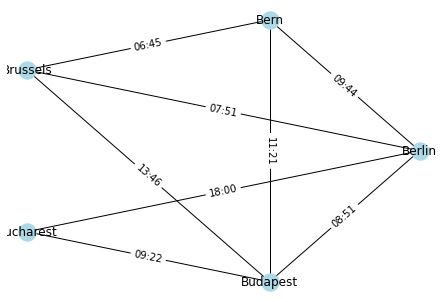

In [1]:
# Your code to draw the graph
# Below is an example of how the graph could be like; your graph can look different



## Taks 2: Computing the Shortest Path

**Your task:** For each pair of capitals, compute the length of a shortest path between them, i.e., the route from one capital to another with the smallest travel time.

**Optional task**: In addition to the shortest path length, print out a shortest path.

_Hint 1_: In the last step, you might have created a graph with travel_time as edges attributes. If the attributes are strings (e.g. `09:44`), you might want to covert them to numbers to compute the sum of travel times. For example, you can convert `09:44` to $9\times 60+44=584$ minutes, and use 584 as your new attribute for the edge between Berlin and Bern.

_Hint 2_: The module `networkx` comes with many useful functions. In particular, given a weighted graph, we can directly ask `networkx` to compute the shortest path between two vertices. More specifically, the following code 

> `shortest_path(G[, source, target, weight])` 

computes the shortest weighted path in G from the source vertex to the target vertex. You can look into the reference page https://networkx.org/documentation/stable/reference/index.html for more details. 

In [2]:
# Your code to compute the shortest path



## Task 3: Computing the Shortest Tour

**Your task:** Find the shortest Hamiltonian cycle, i.e., a cycle that starts and ends at the same capital and visits every capital exactly once. What is the complexity of your algorithm (given an $n$-vertex graph)?

*Hint:* The problem of finding a shortest Hamiltonian cycle is known as the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem). It is NP-hard, so it is unlikely that we can find a fast algorithm to solve this problem. Therefore, we can simply solve this problem using 'brute force'. Let's try to answer this question: how can we describe all sequences of vertices that can potentially form a Hamiltonian cycle?

The idea is to consider all permutations of vertices. Then, for every permutation that forms a cycle, compare its length to the shortest cycle we have seen so far and update the best solution accordingly. The complexity of this algorithm is $O(n \cdot n!)$.

In [3]:
# Your code to compute the shortest tour



Congratulations! You have finished all tasks for computing shortest path and cycles this week. Below are some more tools in `networkx` that could be useful.

## Appendix: More Advanced Tools


### Example 1: Another way of checking the existence of an edge

Another way to check if an edge exists is to check if one node contains another node in its <i>adjacency list</i>.
The adjacencies of `G` can be accessed using `G.adj`.
The specific neighbors of a node can be accessed using the command `G.adj[v]`, where `v` is the node whose neighbors we want. For example, the following piece of code returns all the neighbors of Berlin: `G.adj['Berlin']`.

In [4]:
G.adj['Berlin']

AtlasView({'Bern': {'travel_time': '09:44'}, 'Brussels': {'travel_time': '07:51'}, 'Bucharest': {'travel_time': '18:00'}, 'Budapest': {'travel_time': '08:51'}})

### Example 2: Induced subgraphs

Let $G=(V,E)$ be a graph with vertex set $V$ and edge set $E$. Let $U\subset V$ be a subset of vertices, then the induced subgraph $G[U]$ is a subgraph of $G$ with vertex set $U$, and all edges with both endpoints in $U$. An induced subgraph of `G` contains the relationships for a certain subset of the nodes. 

Given a set `U` of nodes of `G`, we can use the command `H = G.subgraph(U)` to create the subgraph induced by `U`. For example, the following piece of code shows the induced subgraph with vertices Berlin, Bern and Brussels.

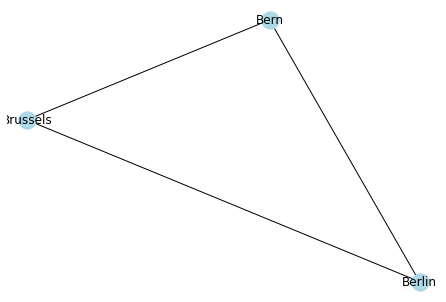

In [5]:
# Create H using these nodes
U = ["Bern", "Berlin", "Brussels"]
H = G.subgraph(U)

# Draw H
nx.draw(H,with_labels=True, pos = node_pos, node_color = 'lightblue')

### Example 3: Breadth first search

As you can imagine, `networkx` also comes with the BFS algorithm. Suppose that we want to run the BFS algorithm on `G` using `Bern` as a root. One method to run BFS is using the command 

> `edges_from_BFS = list(nx.bfs_edges(G, 'Bern'))`

The command above runs `nx.bfs_edges(G, 'Bern')` and returns the edges found by the BFS algorithm in the order that the BFS algorithm found them.

_Note:_ The command `nx.bfs_edges(G, 'Bern')` returns a data structure called a generator. You do not need to know what it is. We use `list()` to transform it into a list, which we are familiar with.

Run the following code to run BFS on `G` starting at `Bern`. We print the edges and nodes in the order they are visited.

In [6]:
# Run BFS on G with root Bern
edges_from_BFS = list(nx.bfs_edges(G, 'Bern'))

# Print the edges from the BFS algorithm
print(f'Here are the edges that BFS finds if we start at Bern :{edges_from_BFS}.')

# Print the nodes from the BFS algorithm
nodes_from_BFS = ['Bern'] + [v for u, v in edges_from_BFS]
print(f'Here are the nodes that BFS finds if we start at Bern: {nodes_from_BFS}.')

Here are the edges that BFS finds if we start at Bern :[('Bern', 'Berlin'), ('Bern', 'Brussels'), ('Bern', 'Budapest'), ('Berlin', 'Bucharest')].
Here are the nodes that BFS finds if we start at Bern: ['Bern', 'Berlin', 'Brussels', 'Budapest', 'Bucharest'].


Finally, we can draw `G` with only the edges visited by `BFS`. 

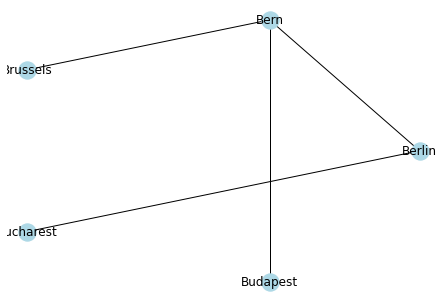

In [7]:
# Draw G with the edges of M
nx.draw(G, pos = node_pos , edgelist = edges_from_BFS, 
              with_labels=True, node_color = 'lightblue')